<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Aqueous Geothermometry and Univariant Curves</h1><br />
</tr>
</table>
</left>

This notebook contains four examples of using univariant curves to solve for temperatures or pressures when starting with a logK value for a reaction. The first three examples show how **aqueous silica geothermometry** can be used to solve for 'temperatures of last equilibration' for dissolved silica and a mineral assemblage. The final example shows that it is also possible to solve for 'pressures of last equilibration'.

First, load packages:

In [1]:
from pychnosz import *
import aqequil
_ = thermo("WORM")
ae = aqequil.AqEquil(db="wrm") # gets things ready for a short speciation demo later

reset: thermodynamic system initialized
The WORM thermodynamic database has been loaded: 1713 aqueous, 1976 total species
Loading a user-supplied thermodynamic database...
data1.wrm is now set as the active thermodynamic database.
This database is meant for rapid calculations between 0 and 350 °C at water saturation pressure.


---
### Example 1: Silica in equilibrium with quartz

You are in Yellowstone National Park sampling water from five different hot springs and measure dissolved silica log activities of -2.71, -2.22, -1.84, -2.42, and -2.35. You figure these activities might indicate water-rock interactions with quartz in the hot subsurface. Quartz in equilibrium with aqueous silica can be written as:

$$ \mathop{\rm{SiO_{2(cr)}}}\limits_{(quartz)} \rightleftharpoons \rm{SiO_{2(aq)}} $$

The logK of this reaction can be found from: 

\begin{align}
\log K & = \log a\rm{SiO_{2(aq)}} - \log a\mathop{\rm{SiO_{2(cr)}}}\limits_{(quartz)} \\
\log K & = \log a\rm{SiO_{2(aq)}} - 0 \\
\log K & = \log a\rm{SiO_{2(aq)}}
\end{align}

What subsurface temperatures might be expected to produce observed activities of dissolved silica? We can also try pressures of 200 and 400 bars to see how changes in pressure affect these predicted temperatures. First, let's check if quartz and aqueous silica are available in the thermodynamic database:

In [2]:
# This should return quartz's entry in the thermodynamic database
# Warnings should also appear about available phase transitions and a heat capacity (Cp) calculation
info(info("quartz"))

info_character: found quartz(cr) with 1 polymorphic transition


,name,abbrv,formula,state,ref1,ref2,date,model,E_units,G,...,Cp,V,a,b,c,d,e,f,lambda,T
0,quartz,Qtz,SiO2,cr,HDNB78,NaN,5/5/1978,CGL,cal,-204646.0,...,NaN,22.688,11.22,0.0082,-270000.0,0.0,0.0,0.0,0.0,848.0


In [3]:
# This should return aqueous silica's entry in the thermodynamic database
# Warnings should also appear to say that SiO2 is available as aqueous (aq) and crystalline (cr) phases
info(info("SiO2"))

info_character: found SiO2(aq); also available in cr


,name,abbrv,formula,state,ref1,ref2,date,model,E_units,G,...,Cp,V,a1,a2,a3,a4,c1,c2,omega,Z
0,SiO2,NaN,SiO2,aq,SHS89,NaN,1/13/1989,HKF,cal,-199190.0,...,-76.1,16.1,0.19,170.0,20.0,-27000.0,29.1,-512000.0,12910.0,0.0


Solving for T at P = 200 bar...
Solving for T at P = 400 bar...
  Using warm start: searching 97.2 to 197.2°C


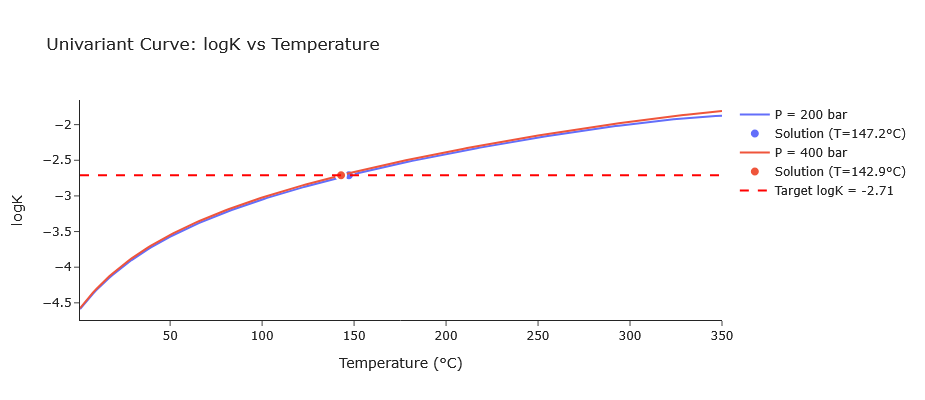


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1,quartz,SiO2,cr,811,CGL
1,1,SiO2,SiO2,aq,67,HKF



Results:


,T,P,logK,G,H,S,V,Cp,rho
0,147.196095,200,-2.710002,21808.532423,21361.241960,-1.044412,-10.976758,-1.536573,None
1,142.929008,400,-2.710001,21587.138686,21343.324852,-0.566089,-10.819780,-2.606344,None


In [4]:
out = unicurve(solve="T",
               logK=-2.71, # measured SiO2 log activities: -2.71, -2.22, -1.84, -2.42, and -2.35
               species=["quartz", "SiO2"], # chemical species
               state=["cr", "aq"], # aq, gas, liq, cr
               coeff=[-1, 1], # reaction stoichiometry (negative means reactants, positive means products)
               pressures=[200, 400], # pressure(s) used to solve for temperature
               minT=1, # min T (°C)
               maxT=350) # max T (°C)

A temperature range of about 140 to 250 $^\circ$C at 200 to 400 bars might explain the activities of dissolved silica measured in 4/5 samples assuming equilibrium with quartz. One sample could not be solved at 200 bars, indicating that a higher pressure or a different subsurface mineral assemblage might be required to explain dissolved silica activity.

---
### Example 2: Silica in equilibrium with cristobalite

The five hot spring water samples you obtained in Example 1 have dissolved silica log activities of -2.71, -2.22, -1.84, -2.42, and -2.35. Equilibrium with quartz in the hot subsurface might explain these values, but so might water-rock interactions with cristobalite. Cristobalite in equilibrium with aqueous silica can be written as:

$$ \mathop{\rm{SiO}_{2(cr)}}\limits_{(cristobalite)} \rightleftharpoons \rm{SiO}_{2(aq)} $$

Like in the previous quartz example, the logK of this reaction can be found from the activity of aqueous silica: 

\begin{align}
\log K & = \log a\rm{SiO}_{2(aq)}
\end{align}

What temperature would be required to produce observed aqueous silica activities in equilibrium with cristobalite? Are these temperatures very different than the those obtained in Example 1? Assume a subsurface pressure of 200 bars. First, let's check if cristobalite is available in the thermodynamic database:

In [5]:
# This should return cristobalite's entry in the thermodynamic database
info(info("cristobalite,alpha"))

,name,abbrv,formula,state,ref1,ref2,date,model,E_units,G,...,Cp,V,a,b,c,d,e,f,lambda,T
0,"cristobalite,alpha",A-Crs,SiO2,cr,HDNB78,NaN,5/5/1978,CGL,cal,-203895.0,...,NaN,25.74,13.98,0.00334,-381000.0,0.0,0.0,0.0,0.0,1000.0


Solving for T at P = 200 bar...


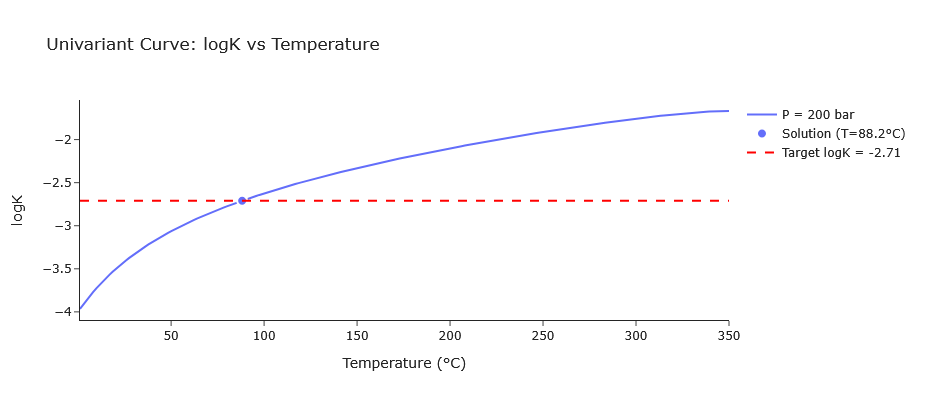


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1,"cristobalite,alpha",SiO2,cr,773,CGL
1,1,SiO2,SiO2,aq,67,HKF



Results:


,T,P,logK,G,H,S,V,Cp,rho
0,88.194936,200,-2.71,18747.401907,18961.800573,0.585093,-12.509713,-56.617074,None


In [6]:
out = unicurve(solve="T",
               logK=-2.71, # measured SiO2 log activities: -2.71, -2.22, -1.84, -2.42, and -2.35
               species=["cristobalite,alpha", "SiO2"], # chemical species
               state=["cr", "aq"], # aq, gas, liq, cr
               coeff=[-1, 1], # reaction stoichiometry (negative means reactants, positive means products)
               pressures=200, # pressure(s) used to solve for temperature
               minT=1, # min T (°C)
               maxT=350) # max T (°C)

Of the five samples, four temperatures can be solved using cristobalite to dissolved silica and range between 88 and 272 $^\circ$C. In general, these require lower temperatures than those predicted from equilibrium with quartz (about 140 to 340 $^\circ$C at 200 bars from Example 1).

---
### Example 3: K-feldspar, kaolinite, and muscovite assemblage

The five hot spring water samples we looked at in Examples 1 and 2 have dissolved silica log activities of -2.71, -2.22, -1.84, -2.42, and -2.35. This time, you decide to explore the possibility that these silica activities could indicate water-rock interactions with a K-feldspar, kaolinite, and muscovite mineral assemblage in the hot subsurface.

\begin{align}
\mathop{\rm{K(AlSi_{3})O_{8}}}\limits_{(K\text{-}feldspar)} + \mathop{\rm{Al_{2}Si_{2}O_{5}(OH)_{4}}}\limits_{(kaolinite)} & \rightleftharpoons \rm{H_{2}O} + \rm{2SiO_{2(aq)}} + \mathop{\rm{KAl_{2}(AlSi_{3})O_{10}(OH)_{2}}}\limits_{(muscovite)} \\
\end{align}

The logK of this reaction can be written as:

$$ \log K = 2\log a\rm{SiO_{2(aq)}} $$

What temperature would be required to produce observed aqueous silica activities in equilibrium with this mineral assemblage? Are these any different than the temperatures obtained in Examples 1 and 2? Assume a subsurface pressure of 200 bars. First, let's check if these minerals are in the database.

In [7]:
info(info(["K-feldspar", "kaolinite", "muscovite"]))

,name,abbrv,formula,state,ref1,ref2,date,model,E_units,G,...,Cp,V,a,b,c,d,e,f,lambda,T
0,K-feldspar,K-Fs,K(AlSi3)O8,cr,HDNB78,NaN,5/5/1978,CGL,cal,-895374.0,...,NaN,108.87,76.617,0.004311,-2994500.0,0.0,0.0,0.0,0.0,1400.0
1,kaolinite,Kln,Al2Si2O5(OH)4,cr,HDNB78,NaN,5/5/1978,CGL,cal,-905614.0,...,NaN,99.52,72.770,0.029200,-2152000.0,0.0,0.0,0.0,0.0,1000.0
2,muscovite,Ms,KAl2(AlSi3)O10(OH)2,cr,HDNB78,NaN,5/5/1978,CGL,cal,-1336301.0,...,NaN,140.71,97.560,0.026380,-2544000.0,0.0,0.0,0.0,0.0,1000.0


Solving for T at P = 200 bar...


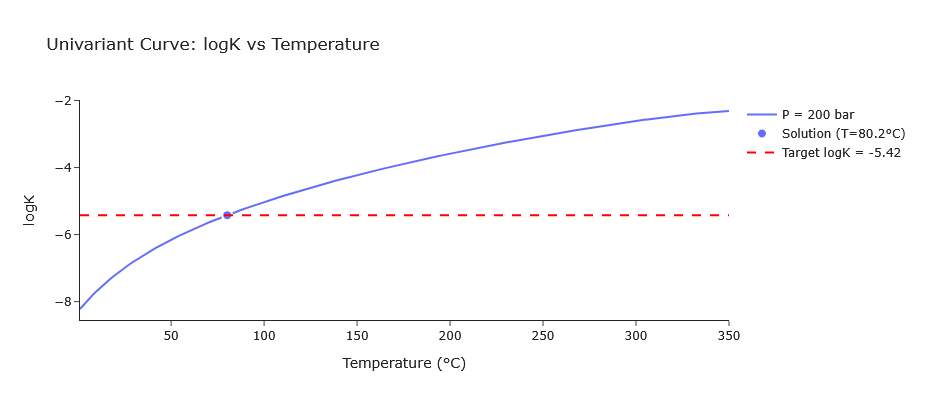


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1,K-feldspar,K(AlSi3)O8,cr,807,CGL
1,-1,kaolinite,Al2Si2O5(OH)4,cr,791,CGL
2,1,water,H2O,liq,1,water.SUPCRT92
3,2,SiO2,SiO2,aq,67,HKF
4,1,muscovite,KAl2(AlSi3)O10(OH)2,cr,803,CGL



Results:


,T,P,logK,G,H,S,V,Cp,rho
0,80.164891,200,-5.42,36661.573646,50701.358068,39.740879,-22.36274,-107.090014,None


In [8]:
out = unicurve(solve="T",
               logK=-2.71*2, # logaSiO2 multiplied by 2 to get logK. Measured logaSiO2: -2.71, -2.22, -1.84, -2.42, and -2.35
               species=["K-feldspar", "kaolinite", "H2O", "SiO2", "muscovite"], # chemical species
               state=["cr", "cr", "liq", "aq", "cr"], # aq, gas, liq, cr
               coeff=[-1, -1, 1, 2, 1], # reaction stoichiometry (negative means reactants, positive means products)
               pressures=200, # pressure(s) used to solve for temperature
               minT=1, # min T (°C)
               maxT=350) # max T (°C)

In [9]:
out

UnivariantResult with 1 points

A 108 to 223 $^\circ$C temperature range is needed to explain dissolved silica equilibrium with a K-feldspar, kaolinite, and muscovite assemblage at 200 bars, which is different than the ranges obtained using either quartz or cristobalite.

---
### Example 4: silica geothermometry in a serpentinizing system

<div>
<img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/2-Reaction-Properties/4-Univariant-Curves/oman.jpg" width="500" align="center"/>     <img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/2-Reaction-Properties/4-Univariant-Curves/pigs.jpg" width="500" align="center"/>
</div>


You are a researcher visiting the Oman Ophiolate and are curious about how alkaline the spring water is. You suspect a geologic process called serpentinization is causing this and want to find out how hot it gets below the surface where serpentinization of rocks is taking place. You take two samples from high pH (pH > 11) fluids seeping out from peridotite outcrops. You name these samples "Gas Crack" and "Snail". Back at the lab, you use mass spectrometry to find total silicon (Si) dissolved in each sample:

| Sample     | Total Si ($\mu$molal)  |
| ---------- |-----------------------:|
| Gas Crack  |  1.38                  |
| Snail      | 10.5                   |

With geothermometry, you can use dissolved silica, $\rm{SiO_{2(aq)}}$, to infer the subsurface temperature where these fluids came from. When water reacts with peridotite in the Oman Ophiolite, serpentinization occurs and the silica activity of the fluid can be buffered by both chrysotile (a mineral in the serpentine group) and brucite:

\begin{align}
\mathop{\rm{Mg_{3}Si_{2}O_{5}(OH)_{4}}}\limits_{(chrysotile)} + \rm{H_{2}O} & \rightleftharpoons \mathop{\rm{3Mg(OH)_{2}}}\limits_{(brucite)} + 2\rm{SiO_{2(aq)}} \\
\end{align}

The logarithm of the equilibrium constant (logK) of this reaction can be written as a function of the chemical activities (denoted by the symbol $a$) of the reactants and products:

\begin{align}
\log K & = 2\log a\rm{SiO_{2(aq)}} + 3 \log a\mathop{\rm{Mg(OH)_{2}}}\limits_{(brucite)}\\
& - \log a\mathop{\rm{Mg_{3}Si_{2}O_{5}(OH)_{4}}}\limits_{(chrysotile)} - \log a\rm{H_{2}O}\\
\end{align}

The chemical activities of minerals and pure liquid water are all approximately equal to 1 under these conditions. If we substitute 1 for chemical activities in the previous equation we get:

\begin{align}
\log K & = 2\log a\rm{SiO_{2(aq)}} + 3 \log 1 - \log 1 - \log 1 \\
\log K & = 2\log a\rm{SiO_{2(aq)}} + 0 - 0 - 0 \\
\log K & = 2\log a\rm{SiO_{2(aq)}}
\end{align}

From this, you can approximate the equilibrium constant from the chemical activity of dissolved silica!

However, as the pH is highly alkaline in these samples, and silica can change forms depending on pH conditions. Note how $\rm{HSiO_{3}^{-}}$ becomes a dominant form at high pH in the activity diagram below:

info_character: found SiO2(aq); also available in cr
info_character: found H2O(liq) [water]; also available in gas
info_character: found H2(aq); also available in gas
info_character: found SiO2(aq); also available in cr


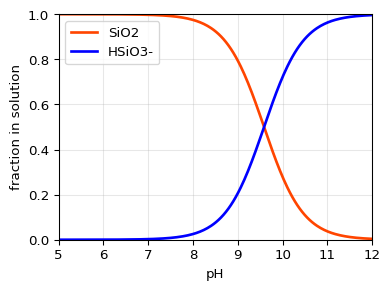

In [10]:
basis(["SiO2", "H2O", "H2", "H+"])
species(["SiO2", "HSiO3-"])
a = affinity(pH=[5, 12], T=25, messages=False)

# create a diagram (the parameters below adjust how it looks)
d = diagram(a,
        #adj=[0.5, 0.3],
        #dy=[-0.2, -0.2],
        alpha=True,
        ylim=[0, 1],
        ylab="fraction in solution",
        col=["orangered", "blue"],
        lty=[1, 1, 1],
        lwd=[2, 2, 2],
        width=400,
        height=300,
        #dpi=100,
        messages=False,
        plot_it=False,
       )

d["fig"]

Calculating the likely forms of measured solutes is called **speciation**. Thermodynamics can be used to calculate the **speciated** forms of solutes, including complexation of ions, degree of acid/base association and dissociation, and even oxidation-reduction states (*e.g.*, Fe$^{2+}$ vs Fe$^{3+}$). This is done by performing iterative calculations that attempt to approach chemical equilibrium among solutes within the entire system (*e.g.*, an entire water sample). These kinds of calculations are complicated to perform by hand, so computer programs are typically used instead.

The WORM Portal has a built-in speciation tool called *AqEquil*. Notebooks that delve into aqueous speciation can be found in the WORM-Library. For now, AqEquil can be used to speciate the Gas Crack and Snail water sample data recorded in 'oman_water_data.csv':

In [11]:
speciation = ae.speciate(input_filename="oman_water_data.csv",
                         exclude=["Year", "Area"],
                         delete_generated_folders=True)

Using wrm to speciate Gas Crack
Using wrm to speciate Snail
Finished!


In [12]:
speciation.lookup("SiO2") # look up the log activity of SiO2 after speciation

Sample,SiO2
,log_activity
Sample,
Gas Crack,-8.3337
Snail,-7.2295


After speciating these Oman Ophiolite samples in EQ3, we can see that the $\log a\rm{SiO_{2(aq)}}$ is -8.33 for "Gas Crack" and -7.23 for "Snail". Now try using silica geothermometry to infer last temperature of equilibration with chrysotile and brucite assuming a subsurface pressure of 200 bars.

Calculate how the logK of the reaction changes as a function of temperature at 200 bars pressure, then find the temperature corresponding to the logK predicted from activities of $\rm{SiO_{2(aq)}}$ measured in "Gas Crack" and "Snail". This is the predicted "temperature of last equilibration" between chrysotile and brucite.

After speciating these Oman Ophiolite samples in EQ3, we can see that the $\log a\rm{SiO_{2(aq)}}$ is -8.33 for "Gas Crack" and -7.23 for "Snail". Now try using silica geothermometry to infer last temperature of equilibration with chrysotile and brucite assuming a subsurface pressure of 200 bars.

First, are chrysotile and brucite available in the thermodynamic database?

In [13]:
# This should return chrysotile's entry in the thermodynamic database
info(info("chrysotile"))

,name,abbrv,formula,state,ref1,ref2,date,model,E_units,G,...,Cp,V,a,b,c,d,e,f,lambda,T
0,chrysotile,Ctl,Mg3Si2O5(OH)4,cr,HDNB78,NaN,5/5/1978,CGL,cal,-964871.0,...,NaN,108.5,75.82,0.0316,-1758000.0,0.0,0.0,0.0,0.0,1000.0


In [14]:
# This should return brucite's entry in the thermodynamic database
info(info("brucite"))

,name,abbrv,formula,state,ref1,ref2,date,model,E_units,G,...,Cp,V,a,b,c,d,e,f,lambda,T
0,brucite,Brc,Mg(OH)2,cr,HDNB78,NaN,5/5/1978,CGL,cal,-199646.0,...,NaN,24.63,24.147,0.004012,-611000.0,0.0,0.0,0.0,0.0,900.0


Solving for T at P = 200 bar...


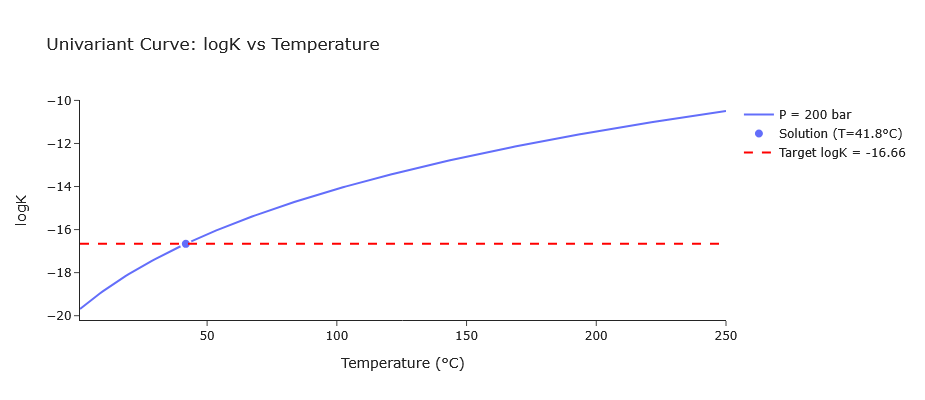


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1,chrysotile,Mg3Si2O5(OH)4,cr,769,CGL
1,-1,water,H2O,liq,1,water.SUPCRT92
2,3,brucite,Mg(OH)2,cr,767,CGL
3,2,SiO2,SiO2,aq,67,HKF



Results:


,T,P,logK,G,H,S,V,Cp,rho
0,41.785865,200,-16.659999,100449.310634,106441.292701,18.982269,-22.402769,-450.873699,None


In [15]:
out = unicurve(solve="T",
               logK=-8.33*2, # logaSiO2 multiplied by 2 to get logK. Measured logaSiO2: -8.33 (Gas Crack), -7.23 (Snail)
               species=["chrysotile", "H2O", "brucite", "SiO2"], # chemical species
               state=["cr", "liq", "cr", "aq"], # aq, gas, liq, cr
               coeff=[-1, -1, 3, 2], # reaction stoichiometry (negative means reactants, positive means products)
               pressures=200, # pressure(s) used to solve for temperature
               minT=1, # min T (°C)
               maxT=250) # max T (°C)

Temperatures of about 41 $^{\circ}$C for "Gas Crack" and 90 $^{\circ}$C for "Snail" might explain dissolved silica activities in these samples assuming chrysotile equilibrium with brucite at 200 bars.

---
### Example 5: solving for pressures of equilibration
The Knallgas reaction for gaseous hydrogen and oxygen:
$$ H_{2(gas)} + O_{2(gas)} \rightleftharpoons H_{2}O_{(liq)} $$

Which pressures correspond to a logK of 33.60 at 76 through 80 degrees Celsius?

Solving for P at T = 76 °C...
Solving for P at T = 77 °C...
  Using warm start: searching 1986 to 2986 bar
Solving for P at T = 78 °C...
  Using warm start: searching 1516 to 2516 bar
Solving for P at T = 79 °C...
  Using warm start: searching 1052 to 2052 bar
Solving for P at T = 80 °C...
  Using warm start: searching 596 to 1596 bar


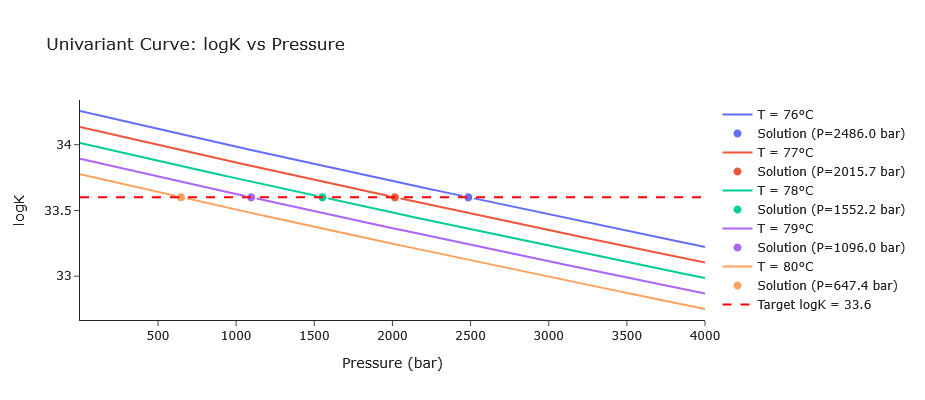


Reaction:


,coeff,name,formula,state,ispecies,model
0,-1.0,H2(g),H2,gas,854,CGL
1,-0.5,O2(g),O2,gas,861,CGL
2,1.0,water,H2O,liq,1,water.SUPCRT92



Results:


,T,P,logK,G,H,S,V,Cp,rho
0,76,2486.010235,33.6,-224595.576027,-280673.678922,-160.728314,16.972733,26.001775,None
1,77,2015.651119,33.6,-225238.839604,-281307.145850,-160.241308,17.206245,26.657483,None
2,78,1552.174508,33.6,-225882.103221,-281934.643387,-159.740077,17.459529,27.435307,None
3,79,1095.954161,33.6,-226525.366682,-282555.194170,-159.221966,17.735846,28.373141,None
4,80,647.417179,33.6,-227168.629882,-283167.073365,-158.682235,18.039880,29.514847,None


In [16]:
out = unicurve(solve="P",
               logK=33.60,
               species=["H2", "O2", "H2O"], # chemical species
               state=["gas", "gas", "liq"], # aq, gas, liq, cr
               coeff=[-1, -0.5, 1], # reaction stoichiometry (negative means reactants, positive means products)
               temperatures=[76, 77, 78, 79, 80], # temperatures used to solve for pressure
               minP=1, # min P (bar)
               maxP=4000) # max P (bar)

2486, 2016, 1552, 1096, and 647 bars correspond to a logK of 33.60 at 76 through 80 $^\circ$C, respectively.